In [ ]:
# Data: 
    # artificially generated data set with two feature columns and a label column with 0 and 1
    # data could be interpreted as a group of people who exhibit or not certain medical symptoms based on Age and Weight
# Classification:
    # apply KNN and NaiveBayes and compare results
    # emphasis is on visual representation of the models goodness of fit

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style = "whitegrid", font_scale = 1.5)

In [2]:
# artificial data generation using normal distributions

np.random.seed(0)

In [3]:
# generating data set with 600 points separated into two classes

# labels
class_1 = np.transpose([np.zeros(100)]) # 0 - do not exhibit symptoms
class_2 = np.transpose([np.ones(100)]) # 1 - exhibit symptoms

# features
A1 = np.transpose([np.random.normal(30, 5, 100)])
A2 = np.transpose([np.random.normal(200, 10, 100)])
A = np.concatenate((A1, A2, class_1), axis = 1)

B1 = np.transpose([np.random.normal(45, 5, 100)])
B2 = np.transpose([np.random.normal(210, 10, 100)])
B = np.concatenate((B1, B2, class_1), axis = 1)

C1 = np.transpose([np.random.normal(40, 5, 100)])
C2 = np.transpose([np.random.normal(175, 10, 100)])
C = np.concatenate((C1, C2, class_1), axis = 1)

D1 = np.transpose([np.random.normal(40, 8, 100)])
D2 = np.transpose([np.random.normal(245, 10, 100)])
D = np.concatenate((D1, D2, class_2), axis = 1)

E1 = np.transpose([np.random.normal(57, 4, 100)])
E2 = np.transpose([np.random.normal(230, 15, 100)])
E = np.concatenate((E1, E2, class_2), axis = 1)

F1 = np.transpose([np.random.normal(60, 3, 100)])
F2 = np.transpose([np.random.normal(190, 15, 100)])
F = np.concatenate((F1, F2, class_2), axis = 1)

data = np.concatenate((A, B, C, D, E, F), axis = 0)

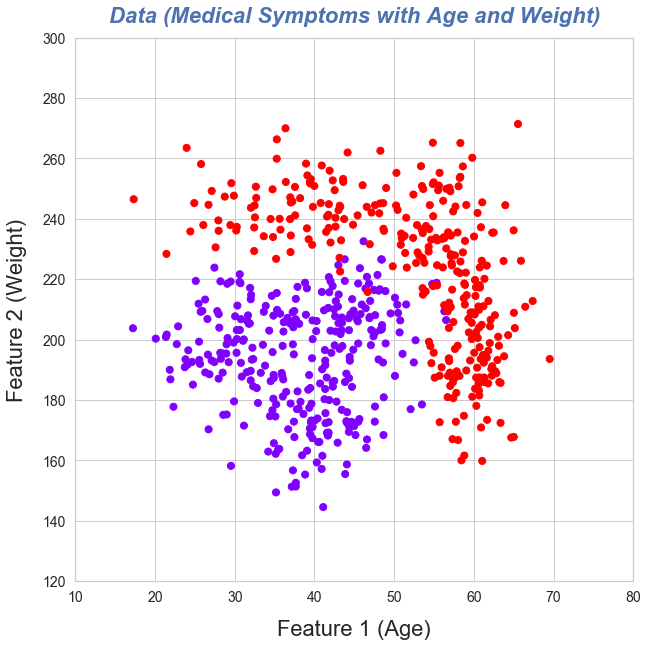

In [4]:
# plot data

# set plot x and y limits
x_min = 10
x_max = 80

d_x = 10

y_min = 120
y_max = 300

d_y = 20

plt.figure(figsize = (10, 10))

ax = plt.axes()
ax.set_xlim(x_min, x_max)
ax.set_xticks(np.arange(x_min, x_max + d_x, d_x))
ax.set_ylim(y_min, y_max)
ax.set_yticks(np.arange(y_min, y_max + d_y, d_y))

plt.scatter(data[:, 0], data[:, 1], c = data[:, 2], cmap = 'rainbow', s = 50)
plt.xlabel('Feature 1 (Age)', fontsize = 22, labelpad = 15)
plt.ylabel('Feature 2 (Weight)', fontsize = 22, labelpad = 15)
plt.title('Data (Medical Symptoms with Age and Weight)', fontsize = 22, fontweight = 'bold', 
          fontstyle = 'italic', pad = 15, c ='b')
plt.tick_params(labelsize = 14)

plt.show()

In [ ]:
# as shown above data has been artificially generated, yet it is quite realistic
# the problem setup: use ML model with this data to predict whether somebody is likely to exhibit the symptoms

In [5]:
# separate data into features, X, and target, y

X = data[:, :-1]
y = data[:, -1]

In [6]:
# since KNN uses distance as a measure of separation, we need to scale the features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
# build KNN model and apply it to the data set

In [7]:
# split data in train/test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# import class KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# use elbow method to find optimal n_neighbors

error_rate = [] # initialize array error_rate

# create loop to run through different n_neighbors
for i in range(1,30):
    knc = KNeighborsClassifier(n_neighbors = i)
    knc.fit(X_train, y_train)
    pred_i = knc.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) # != is non-equal - this determines the error rate

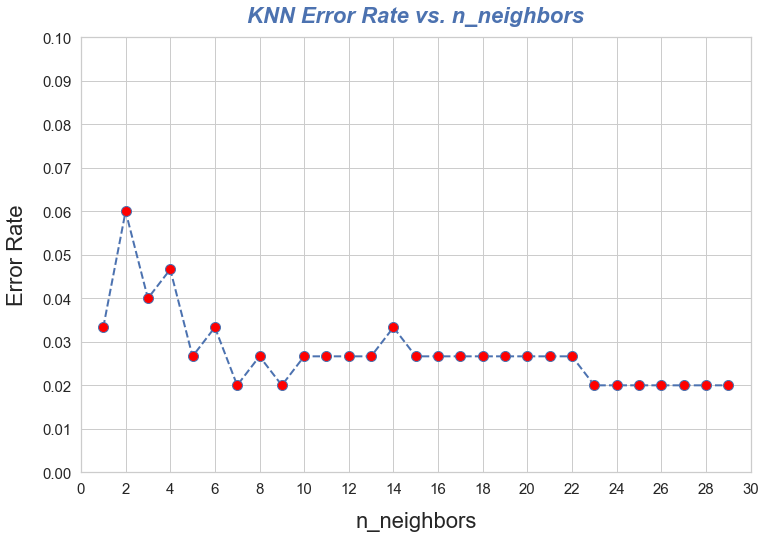

In [9]:
# plot error rate

plt.figure(figsize=(12,8))

axes = plt.axes()
axes.set_xlim(0, 30)
axes.set_xticks(np.arange(0, 31, 2))
axes.set_ylim(0.0, 0.1)
axes.set_yticks(np.arange(0.0, 0.11, 0.01))

plt.plot(range(1,30), error_rate, 'b--', lw=2, marker='o', ms = 10, markerfacecolor='red')

# add labels to graph
plt.xlabel('n_neighbors', fontsize = 22, labelpad = 15)
plt.ylabel('Error Rate', fontsize = 22, labelpad = 15)
plt.title('KNN Error Rate vs. n_neighbors', fontsize = 22, fontweight = 'bold', fontstyle = 'italic', pad = 15, c ='b')
plt.tick_params(labelsize = 15)

plt.show()

In [ ]:
# results show that after n_neighbors = 7 error rate flattens out --> use n_neighbors = 7 in model

In [10]:
# create KNN model with n_neighbors = 7

knc = KNeighborsClassifier(n_neighbors = 7)

# fit and predict
knc.fit(X_train, y_train)
y_pred_knc = knc.predict(X_test)

In [11]:
# compare predictions with test data, y_test

from sklearn.metrics import confusion_matrix, classification_report

print('Confusion Matrix - KNClassifier witn n_neighbors = 7:')
print(confusion_matrix(y_test, y_pred_knc))
print('\n')
print('Classification Report - - KNClassifier witn n_neighbors = 7:')
print(classification_report(y_test, y_pred_knc))

Confusion Matrix - KNClassifier witn n_neighbors = 7:
[[67  3]
 [ 0 80]]


Classification Report - - KNClassifier witn n_neighbors = 7:
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        70
         1.0       0.96      1.00      0.98        80

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



In [ ]:
# excellent prediction accuracy

In [ ]:
# visualize how well the model captured both the training and test data

In [12]:
# define mapping function

def mapData(clf):
    # Create a dense grid of points to sample 
    xx, yy = np.meshgrid(np.arange(-ax_min, ax_max, .005),
                     np.arange(-ax_min, ax_min, .005))
    
    # Convert to Numpy arrays
    npx = xx.ravel()
    npy = yy.ravel()
    
    # Convert to a list of 2D points
    samplePoints = np.c_[npx, npy]
    
    # Generate predicted labels (cluster numbers) for each point
    Z = clf.predict(samplePoints)

    plt.figure(figsize=(10, 10))
    
    Z = Z.reshape(xx.shape) # Reshape results to match xx dimension
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.6) # Draw the contour
    plt.scatter(X_p[:,0], X_p[:,1], s = 50, c=y_p, cmap = 'rainbow') # data points
    plt.xlabel('Feature 1 (scaled)', fontsize = 20, labelpad = 15)
    plt.ylabel('Feature 2 (scaled)', fontsize = 20, labelpad = 15)
    plt.title(title_str, fontsize = 22, c = 'blue', pad = 20)
    plt.tick_params(labelsize= 18)
    plt.show()

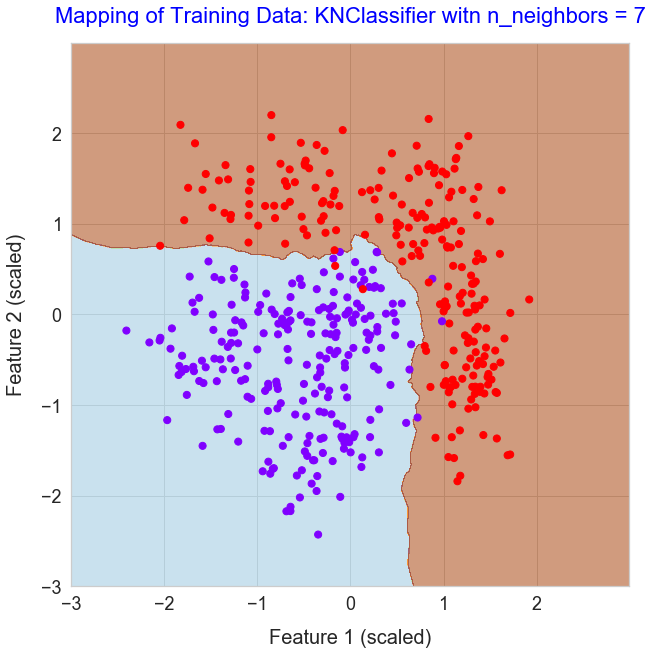

In [13]:
# mapping of training data

ax_min = 3.0
ax_max = 3.0

X_p = X_train
y_p = y_train

title_str = 'Mapping of Training Data: KNClassifier witn n_neighbors = 7'

mapData(knc)

In [ ]:
# excellent classes separation!

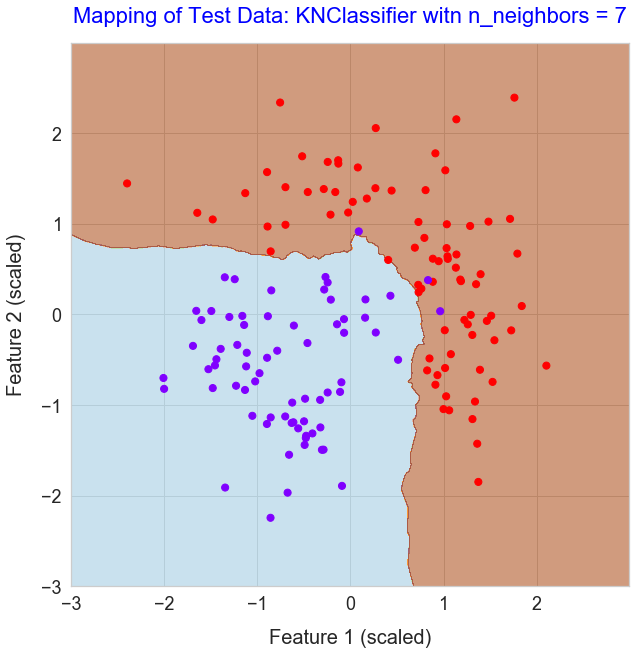

In [14]:
# mapping of test data

ax_min = 3.0
ax_max = 3.0

X_p = X_test
y_p = y_test

title_str = 'Mapping of Test Data: KNClassifier witn n_neighbors = 7'

mapData(knc)

In [ ]:
# excellent classes separation here, too

In [ ]:
# use NaiveBayes model with same data and compare results to KNClassifier results

In [15]:
# create Naive Bayes model, fit, predict

from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()

nbc.fit(X_train, y_train)
y_pred_nbc = nbc.predict(X_test)

In [16]:
# compare predictions with true test data, y_test

print('Confusion Matrix - Naive Bayes:')
print(confusion_matrix(y_test, y_pred_nbc))
print('\n')
print('Classification Report - - Naive Bayes:')
print(classification_report(y_test, y_pred_nbc))

Confusion Matrix - Naive Bayes:
[[65  5]
 [ 1 79]]


Classification Report - - Naive Bayes:
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.96        70
         1.0       0.94      0.99      0.96        80

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [17]:
# for comparison print again knc results

print('Confusion Matrix - KNClassifier witn n_neighbors = 7:')
print(confusion_matrix(y_test, y_pred_knc))
print('\n')
print('Classification Report - - KNClassifier witn n_neighbors = 7:')
print(classification_report(y_test, y_pred_knc))

Confusion Matrix - KNClassifier witn n_neighbors = 7:
[[67  3]
 [ 0 80]]


Classification Report - - KNClassifier witn n_neighbors = 7:
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        70
         1.0       0.96      1.00      0.98        80

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



In [ ]:
# KNClassifier does a little bit better, but both models have excellent prediction scores

In [ ]:
# visualize data separation with Naive Bayes

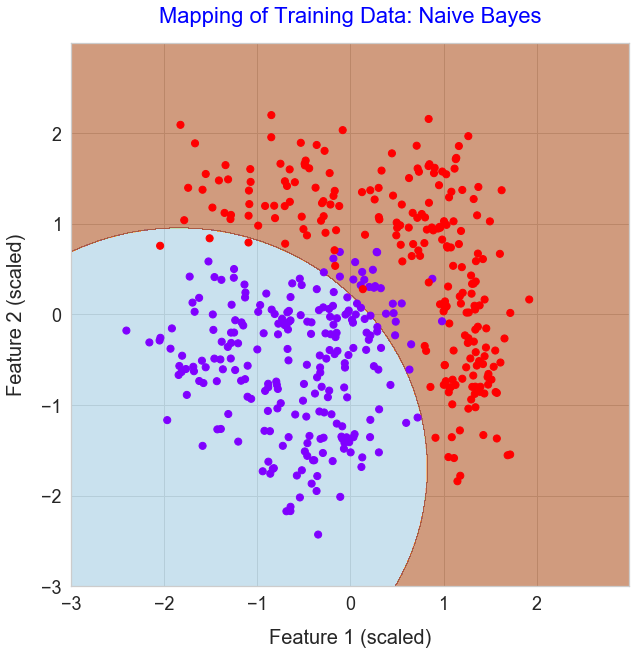

In [18]:
# mapping of training data

ax_min = 3.0
ax_max = 3.0

X_p = X_train
y_p = y_train

title_str = 'Mapping of Training Data: Naive Bayes'

mapData(nbc)

In [ ]:
# now we can see the difference between the two models more clearly
# Naive Bayes experiences problems with classifying the 'blue' data points which propagate deeper into the 'red' region
# we would not have seen these issues if we were gauging only by the confusion matrix and the classification report 
# thus, it is important (if possible) to have a visual or some other representation of the goodness of fit

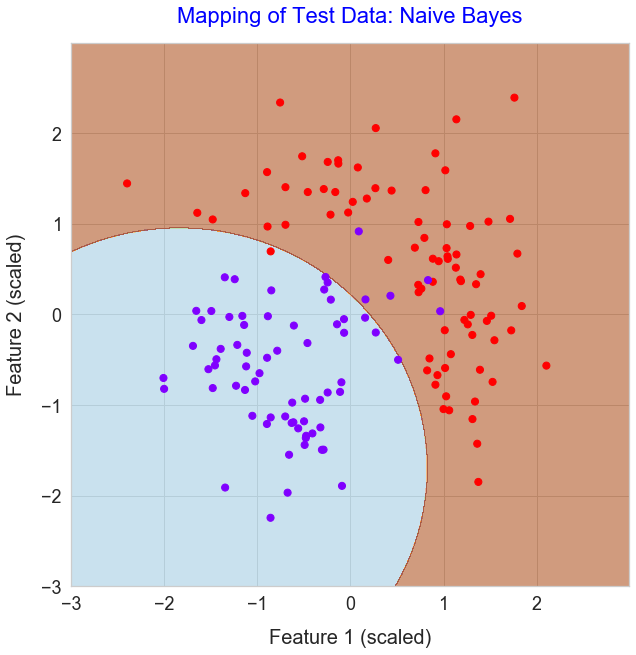

In [19]:
# mapping of test data

ax_min = 3.0
ax_max = 3.0

X_p = X_test
y_p = y_test

title_str = 'Mapping of Test Data: Naive Bayes'

mapData(nbc)

In [ ]:
# same issue is illustrated here, too

In [ ]:
# Summary:
    # KNN and NaiveBayes were applied for classification of hypothetical medical data set
    # Confusion matrix and Classification Report show high accuracy scores for both models
    # Visual representation of the fit, however, reveals that KNN performs better than NaiveBayes with this data set